In [1]:
import pandas as pd

# read the CSV file into a DataFrame
df = pd.read_csv('SALESEDACSV-FallB.csv')

In [2]:
df.dtypes

Time_of_sale        object
Region_of_sale      object
Payment_Type        object
Product_A_Sales    float64
Product_B_Sales    float64
Product_C_Sales    float64
Product_D_Sales      int64
Source_of_Sale      object
dtype: object

In [3]:
df.isnull().sum() #counting number of null values per column in the dataframe

Time_of_sale       0
Region_of_sale     2
Payment_Type       9
Product_A_Sales    1
Product_B_Sales    6
Product_C_Sales    8
Product_D_Sales    0
Source_of_Sale     0
dtype: int64

In [4]:
df.nunique() #getting unique values per column

Time_of_sale       395
Region_of_sale       4
Payment_Type         3
Product_A_Sales    217
Product_B_Sales     58
Product_C_Sales    255
Product_D_Sales    217
Source_of_Sale       3
dtype: int64

In [5]:
import pandas as pd

# Read the CSV file into a pandas dataframe
df = pd.read_csv('SALESEDACSV-FallB.csv')

# Check for missing values in the dataframe
print(df.isnull().sum())

# Fill missing values in the Region_of_sale column with the mode of the column
df['Region_of_sale'].fillna(df['Region_of_sale'].mode()[0], inplace=True)

# Fill missing values in the Payment_Type column with the mode of the column
df['Payment_Type'].fillna(df['Payment_Type'].mode()[0], inplace=True)

# Fill missing values in the Product_A_Sales column with the mean of the column
df['Product_A_Sales'].fillna(df['Product_A_Sales'].mean(), inplace=True)

# Fill missing values in the Product_B_Sales column with the mean of the column
df['Product_B_Sales'].fillna(df['Product_B_Sales'].mean(), inplace=True)

# Fill missing values in the Product_C_Sales column with the mean of the column
df['Product_C_Sales'].fillna(df['Product_C_Sales'].mean(), inplace=True)

Time_of_sale       0
Region_of_sale     2
Payment_Type       9
Product_A_Sales    1
Product_B_Sales    6
Product_C_Sales    8
Product_D_Sales    0
Source_of_Sale     0
dtype: int64


In [6]:
df.head()

,Time_of_sale,Region_of_sale,Payment_Type,Product_A_Sales,Product_B_Sales,Product_C_Sales,Product_D_Sales,Source_of_Sale
0,11:41:35,East,Net banking,398.0,90.0,235.0,102,Etsy
1,0:29:05,South,Net banking,358.0,86.0,493.0,41,Amazon
2,9:03:06,South,Credit card,107.0,78.0,216.0,275,Etsy
3,6:39:16,East,Paypal,153.0,68.0,182.0,50,Etsy
4,22:01:41,East,Net banking,388.0,98.0,71.0,107,Facebook


In [7]:
import datetime as dt

# Example time string
time_str = '11:41:35'

# Convert time string to datetime object
time_obj = dt.datetime.strptime(time_str, '%H:%M:%S')

# Extract time components as floats
hours = time_obj.hour
minutes = time_obj.minute
seconds = time_obj.second

# Calculate total time in hours as a float
total_time = hours + minutes/60 + seconds/3600

# Print the result
print(total_time)

11.693055555555556


In [8]:
#from the above output Payment_Type still have null values so i am removing all the rows with missing values
import pandas as pd

# Read the CSV file into a pandas dataframe
df = pd.read_csv('SALESEDACSV-FallB.csv')

# Check for missing values in the Payment_Type column
print(df['Payment_Type'].isnull().sum())

# Drop all rows with missing values in the Payment_Type column
df.dropna(subset=['Payment_Type'], inplace=True)

9


In [9]:
import pandas as pd

# Read the CSV file into a pandas dataframe
df = pd.read_csv('SALESEDACSV-FallB.csv')

# Remove all rows with NaN values in the Payment_Type column
df = df.dropna(subset=['Payment_Type'])

# Show the updated dataframe
print(df)

    Time_of_sale Region_of_sale Payment_Type  Product_A_Sales  \
0       11:41:35           East  Net banking            398.0   
1        0:29:05          South  Net banking            358.0   
2        9:03:06          South  Credit card            107.0   
3        6:39:16           East       Paypal            153.0   
4       22:01:41           East  Net banking            388.0   
..           ...            ...          ...              ...   
389      4:19:56          South  Credit card            326.0   
390      2:22:56          South  Net banking            161.0   
391     23:36:22           West  Net banking            314.0   
392     14:38:14           West       Paypal            271.0   
393      0:42:13           East  Credit card            150.0   

     Product_B_Sales  Product_C_Sales  Product_D_Sales Source_of_Sale  
0               90.0            235.0              102           Etsy  
1               86.0            493.0               41         Amazon  
2  

/home/patience/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/patience/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/patience/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/patience/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

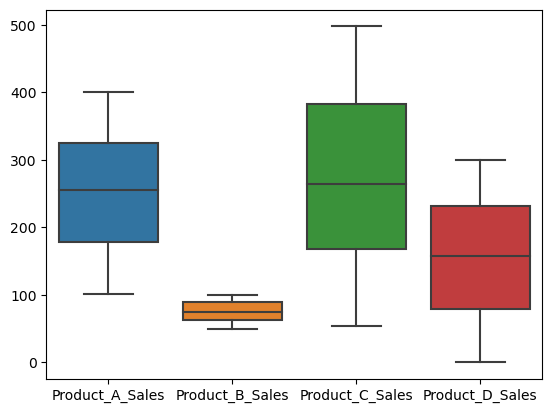

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Calculate the first and third quartiles and the interquartile range (IQR) for the 'Product_A_Sales', 'Product_B_Sales', 'Product_C_Sales', and 'Product_D_Sales' columns
Q1 = df.iloc[:, 3:7].quantile(0.25)
Q3 = df.iloc[:, 3:7].quantile(0.75)
IQR = Q3 - Q1

# Remove any data points that fall outside the lower and upper bounds defined by the IQR for each column
df = df[~((df.iloc[:, 3:7] < (Q1 - 1.5 * IQR)) | (df.iloc[:, 3:7] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Create a box plot of the 'Product_A_Sales', 'Product_B_Sales', 'Product_C_Sales', and 'Product_D_Sales' columns after removing outliers using the IQR method
sns.boxplot(data=df.iloc[:, 3:7])
plt.show()

In [11]:
df.describe()

,Product_A_Sales,Product_B_Sales,Product_C_Sales,Product_D_Sales
count,379.000000,374.000000,373.000000,380.000000
mean,254.928760,75.810160,272.182306,154.378947
std,86.337333,15.106194,125.117983,87.855354
min,101.000000,50.000000,54.000000,0.000000
25%,178.000000,63.000000,168.000000,79.000000
50%,255.000000,75.000000,265.000000,158.000000
75%,325.000000,89.000000,383.000000,232.000000
max,400.000000,100.000000,498.000000,300.000000


In [12]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,384,385,386,387,388,389,390,391,392,393
Time_of_sale,11:41:35,0:29:05,9:03:06,6:39:16,22:01:41,16:33:33,23:23:49,13:31:33,18:19:02,3:58:07,...,11:21:06,6:05:18,21:54:40,10:15:30,13:53:54,4:19:56,2:22:56,23:36:22,14:38:14,0:42:13
Region_of_sale,East,South,South,East,East,North,East,East,West,North,...,South,North,South,West,South,South,South,West,West,East
Payment_Type,Net banking,Net banking,Credit card,Paypal,Net banking,Net banking,Credit card,Credit card,Paypal,Net banking,...,Net banking,Paypal,Credit card,Paypal,Net banking,Credit card,Net banking,Net banking,Paypal,Credit card
Product_A_Sales,398.0,358.0,107.0,153.0,388.0,160.0,323.0,272.0,226.0,315.0,...,141.0,135.0,312.0,323.0,325.0,326.0,161.0,314.0,271.0,150.0
Product_B_Sales,90.0,86.0,78.0,68.0,98.0,87.0,64.0,86.0,72.0,61.0,...,83.0,79.0,75.0,95.0,52.0,60.0,60.0,87.0,65.0,70.0
Product_C_Sales,235.0,493.0,216.0,182.0,71.0,261.0,394.0,404.0,179.0,84.0,...,452.0,272.0,427.0,215.0,465.0,183.0,122.0,393.0,229.0,439.0
Product_D_Sales,102,41,275,50,107,250,85,89,36,179,...,56,191,134,101,188,209,122,33,145,237
Source_of_Sale,Etsy,Amazon,Etsy,Etsy,Facebook,Etsy,Etsy,Etsy,Amazon,Facebook,...,Amazon,Amazon,Facebook,Facebook,Facebook,Etsy,Facebook,Amazon,Etsy,Facebook


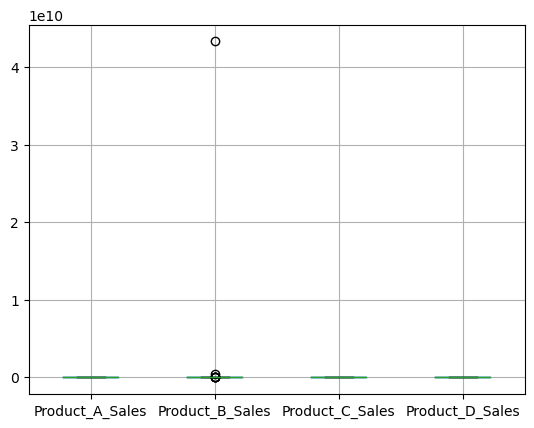

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('SALESEDACSV-FallB.csv')
df.boxplot()
plt.show()

In [14]:
import pandas as pd

df = pd.read_csv('SALESEDACSV-FallB.csv')

df['Total_Sales'] = df[['Product_A_Sales', 'Product_B_Sales', 'Product_C_Sales', 'Product_D_Sales']].sum(axis=1)

In [15]:
df.columns

Index(['Time_of_sale', 'Region_of_sale', 'Payment_Type', 'Product_A_Sales',
       'Product_B_Sales', 'Product_C_Sales', 'Product_D_Sales',
       'Source_of_Sale', 'Total_Sales'],
      dtype='object')

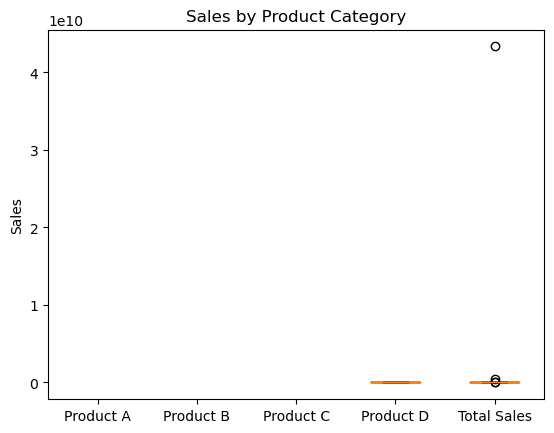

In [16]:
import matplotlib.pyplot as plt

plt.boxplot(df[['Product_A_Sales', 'Product_B_Sales', 'Product_C_Sales', 'Product_D_Sales', 'Total_Sales']].values)
plt.xticks([1, 2, 3, 4, 5], ['Product A', 'Product B', 'Product C', 'Product D', 'Total Sales'])
plt.ylabel('Sales')
plt.title('Sales by Product Category')
plt.show()

In [17]:
#create a new column called Total_Sales
import pandas as pd

df = pd.read_csv('SALESEDACSV-FallB.csv')

# Create a new column called Total_Sales that adds the sales data for each product
df['Total_Sales'] = df[['Product_A_Sales', 'Product_B_Sales', 'Product_C_Sales', 'Product_D_Sales']].sum(axis=1)

# Print the first few rows of the updated dataframe
print(df.head())

  Time_of_sale Region_of_sale Payment_Type  Product_A_Sales  Product_B_Sales  \
0     11:41:35           East  Net banking            398.0             90.0   
1      0:29:05          South  Net banking            358.0             86.0   
2      9:03:06          South  Credit card            107.0             78.0   
3      6:39:16           East       Paypal            153.0             68.0   
4     22:01:41           East  Net banking            388.0             98.0   

   Product_C_Sales  Product_D_Sales Source_of_Sale  Total_Sales  
0            235.0              102           Etsy        825.0  
1            493.0               41         Amazon        978.0  
2            216.0              275           Etsy        676.0  
3            182.0               50           Etsy        453.0  
4             71.0              107       Facebook        664.0  


In [18]:
import pandas as pd

# Read the CSV file into a pandas dataframe
df = pd.read_csv('SALESEDACSV-FallB.csv')

df['Total_Sales'] = df[['Product_A_Sales', 'Product_B_Sales', 'Product_C_Sales', 'Product_D_Sales']].sum(axis=1)

# Calculate the total product sales for each payment type
sales_by_payment = df.groupby('Payment_Type')['Total_Sales'].sum()

# Create a pivot table to display the numerical values of each product by region
pivot_table = pd.pivot_table(df, values='Total_Sales', index='Payment_Type', columns='Region_of_sale', aggfunc='sum')

print(pivot_table)

Region_of_sale         East         North    South     West
Payment_Type                                               
Credit card     435483404.0  4.770640e+05  29383.0  24308.0
Net banking        362526.0  2.331200e+04  26705.0  23470.0
Paypal              22153.0  4.334345e+10  19446.0  23425.0


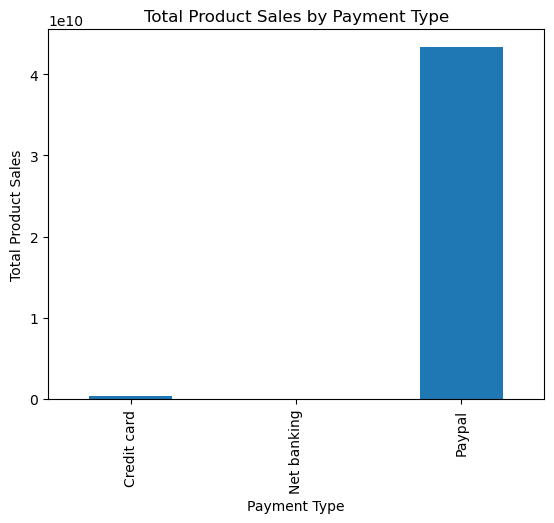

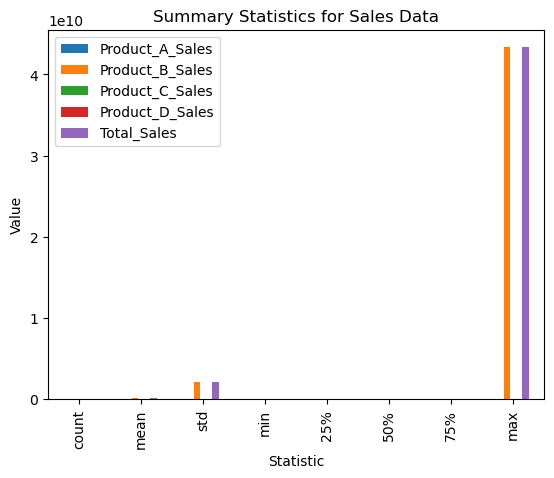

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas dataframe
df = pd.read_csv('SALESEDACSV-FallB.csv')

df['Total_Sales'] = df[['Product_A_Sales', 'Product_B_Sales', 'Product_C_Sales', 'Product_D_Sales']].sum(axis=1)

# Calculate the total product sales for each payment type
sales_by_payment = df.groupby('Payment_Type')['Total_Sales'].sum()

# Plot the sales data for each payment type using a bar plot
sales_by_payment.plot(kind='bar')

# Set the title and axis labels
plt.title('Total Product Sales by Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Total Product Sales')

# Show the plot
plt.show()

# Plot the data in df.describe()
df.describe().plot(kind='bar')

# Set the title and axis labels
plt.title('Summary Statistics for Sales Data')
plt.xlabel('Statistic')
plt.ylabel('Value')

# Show the plot
plt.show()

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the preprocessed data into a pandas DataFrame
df = pd.read_csv('SALESEDACSV-FallB.csv')

df['Total_Sales'] = df[['Product_A_Sales', 'Product_B_Sales', 'Product_C_Sales', 'Product_D_Sales']].sum(axis=1)

# Check for missing values in the dataframe and fill them
df.fillna(df.mode().iloc[0], inplace=True)

# Create a new DataFrame with the total sales of each product in each region
df_product_region = df.groupby(['Region_of_sale']).sum()[['Product_A_Sales', 'Product_B_Sales', 'Product_C_Sales', 'Product_D_Sales']]

# Create a pivot table to display the numerical values of each product by region
pivot_table = pd.pivot_table(df, values='Total_Sales', index='Payment_Type', columns='Region_of_sale', aggfunc='sum')

In [21]:
pivot_table

Region_of_sale,East,North,South,West
Payment_Type,,,,
Credit card,435486364.0,4.789840e+05,31838.0,24746.0
Net banking,362526.0,2.331200e+04,26705.0,23470.0
Paypal,22153.0,4.334345e+10,19446.0,23425.0


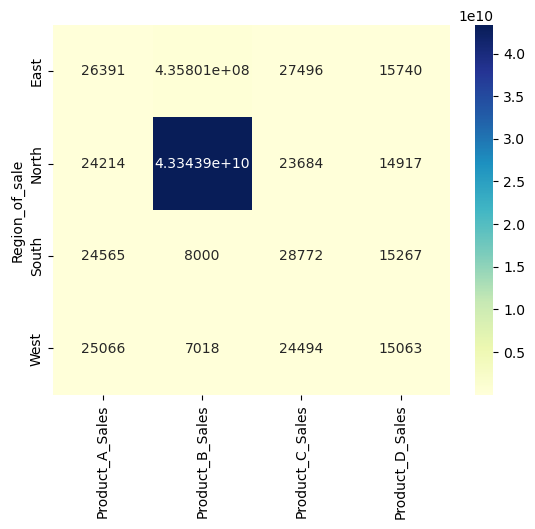

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the preprocessed data into a pandas DataFrame
df = pd.read_csv('SALESEDACSV-FallB.csv')

# Create a new DataFrame with the total sales of each product in each region
df_product_region = df.groupby(['Region_of_sale']).sum()[['Product_A_Sales', 'Product_B_Sales', 'Product_C_Sales', 'Product_D_Sales']]

# Create a heatmap to visualize the total sales of each product in each region
sns.heatmap(df_product_region, annot=True, fmt='g', cmap='YlGnBu')
plt.show()

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('SALESEDACSV-FallB.csv')

# Convert the Time_of_sale column to a datetime object
df['Time_of_sale'] = pd.to_datetime(df['Time_of_sale'])

# Group the time of sale into 3-hour intervals
df['Time_Group'] = pd.cut(df['Time_of_sale'].dt.hour, bins=8, labels=['0-3', '3-6', '6-9', '9-12', '12-15', '15-18', '18-21', '21-24'])

# Group the data by the time intervals and calculate the sum of the product sales
sales_data = df.groupby('Time_Group')[['Product_A_Sales', 'Product_B_Sales', 'Product_C_Sales', 'Product_D_Sales']].sum()

/tmp/ipykernel_163498/1510002984.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time_of_sale'] = pd.to_datetime(df['Time_of_sale'])
/tmp/ipykernel_163498/1510002984.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_data = df.groupby('Time_Group')[['Product_A_Sales', 'Product_B_Sales', 'Product_C_Sales', 'Product_D_Sales']].sum()


In [24]:
pivot_table

Region_of_sale,East,North,South,West
Payment_Type,,,,
Credit card,435486364.0,4.789840e+05,31838.0,24746.0
Net banking,362526.0,2.331200e+04,26705.0,23470.0
Paypal,22153.0,4.334345e+10,19446.0,23425.0


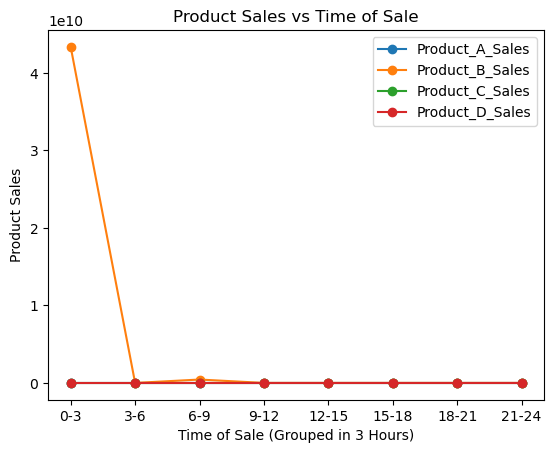

In [25]:
# Plot the results using a line graph
sales_data.plot(kind='line', marker='o')
plt.xlabel('Time of Sale (Grouped in 3 Hours)')
plt.ylabel('Product Sales')
plt.title('Product Sales vs Time of Sale')
plt.show()

In [26]:
import pandas as pd

# Load the preprocessed data into a pandas DataFrame
df = pd.read_csv('SALESEDACSV-FallB.csv')

# Check for missing values in the dataframe and fill them
df.fillna(df.mode().iloc[0], inplace=True)

# Group the sales data by product and region and calculate the total revenue for each group
df_product_region = df.groupby(['Region_of_sale']).sum()[['Product_A_Sales', 'Product_B_Sales', 'Product_C_Sales', 'Product_D_Sales']]

# Create a pivot table to display the numerical values of each product by region
pivot_table = pd.pivot_table(df_product_region, values=['Product_A_Sales', 'Product_B_Sales', 'Product_C_Sales', 'Product_D_Sales'], index=['Region_of_sale'])
print(pivot_table)

                Product_A_Sales  Product_B_Sales  Product_C_Sales  \
Region_of_sale                                                      
East                    26391.0     4.358014e+08          27862.0   
North                   24214.0     4.334389e+10          24233.0   
South                   24913.0     8.306000e+03          29633.0   
West                    25216.0     7.222000e+03          24860.0   

                Product_D_Sales  
Region_of_sale                   
East                    15740.0  
North                   14917.0  
South                   15456.0  
West                    15063.0  


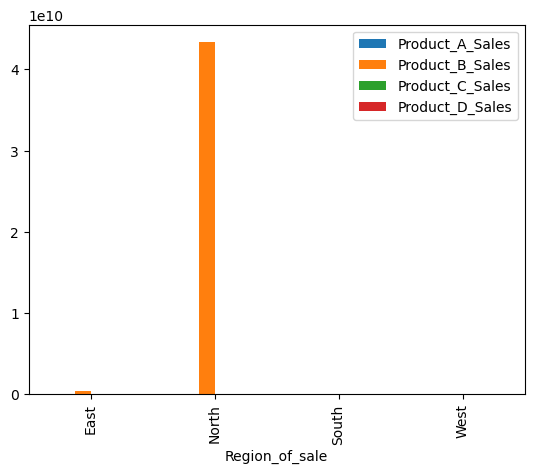

In [27]:
# Create a bar chart of the total revenue by region for each product
pivot_table.plot(kind='bar')
plt.show()

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the preprocessed data into a pandas DataFrame
df = pd.read_csv('SALESEDACSV-FallB.csv')

# Create a new DataFrame with the total sales of each product category
df_product_sales = df[['Product_A_Sales', 'Product_B_Sales', 'Product_C_Sales', 'Product_D_Sales']].sum()



In [29]:
pivot_table

,Product_A_Sales,Product_B_Sales,Product_C_Sales,Product_D_Sales
Region_of_sale,,,,
East,26391.0,4.358014e+08,27862.0,15740.0
North,24214.0,4.334389e+10,24233.0,14917.0
South,24913.0,8.306000e+03,29633.0,15456.0
West,25216.0,7.222000e+03,24860.0,15063.0


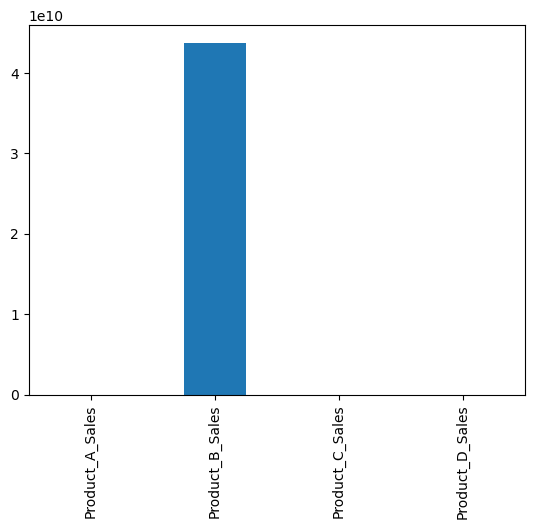

In [30]:
# Create a bar chart to visualize the total sales of each product category
df_product_sales.plot(kind='bar')
plt.show()

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the preprocessed data into a pandas DataFrame
df = pd.read_csv('SALESEDACSV-FallB.csv')

df['Total_Sales'] = df[['Product_A_Sales', 'Product_B_Sales', 'Product_C_Sales', 'Product_D_Sales']].sum(axis=1)

# Convert the 'Time_of_sale' column to a datetime object
df['Time_of_sale'] = pd.to_datetime(df['Time_of_sale'])

# Group the sales data by a specific time interval
df_sales_time = df.groupby(pd.Grouper(key='Time_of_sale', freq='1H')).sum()['Total_Sales']



/tmp/ipykernel_163498/262642977.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time_of_sale'] = pd.to_datetime(df['Time_of_sale'])


In [32]:
pivot_table

,Product_A_Sales,Product_B_Sales,Product_C_Sales,Product_D_Sales
Region_of_sale,,,,
East,26391.0,4.358014e+08,27862.0,15740.0
North,24214.0,4.334389e+10,24233.0,14917.0
South,24913.0,8.306000e+03,29633.0,15456.0
West,25216.0,7.222000e+03,24860.0,15063.0


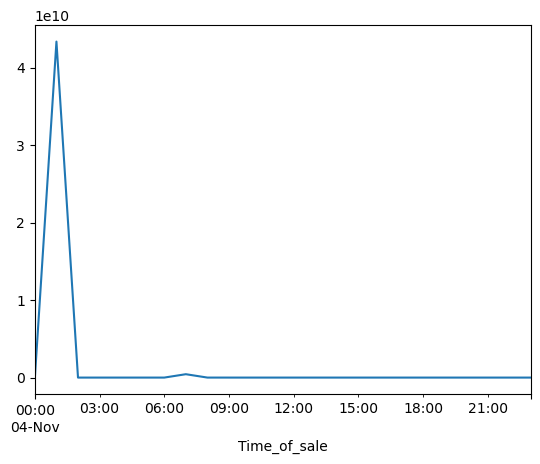

In [33]:
# Create a line chart to visualize the total sales over different time intervals
df_sales_time.plot(kind='line')
plt.show()